### Importación de librerías
Importa todas las librerías necesarias para el procesamiento de datos, visualización, creación y evaluación de modelos de machine learning, y almacenamiento de modelos.

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer


import pickle
from joblib import load  
from joblib import dump


### Carga de datos
Carga el archivo CSV con los datos procesados y muestra las primeras cinco filas del DataFrame para verificar su contenido.

In [124]:
df = pd.read_csv("C:/Users/Acer/OneDrive/Escritorio/Workshops y Proyectos/workshop3/datos/datos_procesados.csv")
df.head()

,Country,Region,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Year,Cluster,Happiness_Level,Happiness Category
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,2.0,Alto,feliz
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,2.0,Alto,feliz
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,2.0,Alto,feliz
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,2.0,Alto,feliz
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,2.0,Alto,feliz


### Inspección de columnas
Muestra todas las columnas del DataFrame para identificar las variables disponibles y facilitar el análisis posterior.

In [125]:
df.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom',
       'Corruption_Perception', 'Generosity', 'Dystopia_Residual', 'Year',
       'Cluster', 'Happiness_Level', 'Happiness Category'],
      dtype='object')

## Preprocesamiento

### Eliminación de columnas innecesarias
Elimina columnas que no son relevantes para el modelo, como identificadores, rangos y columnas relacionadas con errores o intervalos de confianza, ignorando posibles errores si las columnas no existen.

In [301]:
columns_to_drop = [
    'Happiness_Rank', 'Standard_Error', 'Lower_Confidence_Interval',
    'Upper_Confidence_Interval', 'Whisker_High', 'Whisker_Low',
    'Country', 'Year', 'Dystopia_Residual','Happiness Category','Happiness_Level','Cluster','Region_Unknown'
]

df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')


### Visualización de datos limpios
Muestra las primeras cinco filas del DataFrame limpio tras la eliminación de columnas innecesarias para verificar los cambios.

In [302]:
df_cleaned.head()

,Region,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity
0,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


### Inspección de datos limpios
Muestra información detallada del DataFrame `df_cleaned`, incluyendo el número de entradas, columnas, tipos de datos y la presencia de valores nulos, para verificar la estructura y calidad de los datos tras el preprocesamiento.

In [303]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 782 non-null    object 
 1   Happiness_Score        782 non-null    float64
 2   GDP_per_Capita         782 non-null    float64
 3   Social_Support         782 non-null    float64
 4   Life_Expectancy        782 non-null    float64
 5   Freedom                782 non-null    float64
 6   Corruption_Perception  782 non-null    float64
 7   Generosity             782 non-null    float64
dtypes: float64(7), object(1)
memory usage: 49.0+ KB


### Verificación de valores nulos
Muestra la cantidad de valores nulos en cada columna del DataFrame `df_cleaned` para confirmar que los datos están completos después de las operaciones de limpieza.

In [304]:
df_cleaned.isnull().sum()

Region                   0
Happiness_Score          0
GDP_per_Capita           0
Social_Support           0
Life_Expectancy          0
Freedom                  0
Corruption_Perception    0
Generosity               0
dtype: int64

### Codificación de variables categóricas
Aplica codificación (como LabelEncoder o One-Hot Encoding) a las columnas categóricas (`Region`, `Happiness_Level`, `Happiness Category`) para preparar los datos para el modelo.
### Selección de características
Define las variables independientes (X) seleccionando las columnas relevantes del DataFrame limpio y la variable dependiente (y) como `Happiness_Score`.

In [305]:
# Variables predictoras y objetivo
X = df_cleaned.drop(columns=['Happiness_Score',])
y = df_cleaned['Happiness_Score']

# Codificar variables categóricas si existen (por ejemplo, 'Region')
X = pd.get_dummies(X, drop_first=True)


### División de datos en entrenamiento y prueba
Divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando `train_test_split` para evaluar el rendimiento del modelo.

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [307]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [308]:
X_train_scaled.shape


(625, 16)

In [309]:
X_test_scaled.shape

(157, 16)

In [310]:
print(X_test.columns)  # Ver nombres de las columnas originales


Index(['GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom',
       'Corruption_Perception', 'Generosity',
       'Region_Central and Eastern Europe', 'Region_Eastern Asia',
       'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Unknown', 'Region_Western Europe'],
      dtype='object')


### Entrenamiento y evaluación de modelos
Entrena los modelos definidos en el diccionario `models` con el conjunto de entrenamiento, evalúa su rendimiento en los conjuntos de entrenamiento y prueba usando métricas como MSE, RMSE y R², e imprime los resultados. Luego, identifica y guarda el mejor modelo (con mayor R² en el conjunto de prueba) en un archivo `.pkl` para uso futuro.

In [311]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear_model = linear_model.predict(X_test_scaled)
print("Linear Regression:")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_linear_model))
print("R²: ", r2_score(y_test, y_pred_linear_model))
print()

Linear Regression:
Mean Squared Error:  0.3030532053518247
R²:  0.7508561064193569



In [312]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
print("Ridge Regression:")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_ridge))
print("R²: ", r2_score(y_test, y_pred_ridge))
print()

Ridge Regression:
Mean Squared Error:  0.3033239974858689
R²:  0.7506334847627125



In [313]:
# Random Forest
ranf_model = RandomForestRegressor(random_state=42)
ranf_model.fit(X_train_scaled, y_train)
y_pred_ranf_model = ranf_model.predict(X_test_scaled)
print("Random Forest:")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_ranf_model))
print("R²: ", r2_score(y_test, y_pred_ranf_model))
print()

Random Forest:
Mean Squared Error:  0.21306059252131798
R²:  0.8248401777247845



### Guardado del modelo
Guarda el modelo entrenado en un archivo utilizando `pickle` o `joblib` para su uso futuro.

In [200]:
output_dir = r"C:\Users\Acer\OneDrive\Escritorio\Workshops y Proyectos\workshop3\modelo"
os.makedirs(output_dir, exist_ok=True)

model_path = os.path.join(output_dir, "ranf_model_model.pkl")
dump(ranf_model, model_path)

['C:\\Users\\Acer\\OneDrive\\Escritorio\\Workshops y Proyectos\\workshop3\\modelo\\ranf_model_model.pkl']

### 📊 Gráfico de Predicción vs Real

Este gráfico compara los valores reales del `Happiness_Score` con los valores predichos por el modelo.  
Idealmente, los puntos deberían alinearse cerca de la línea roja punteada, que representa una predicción perfecta.


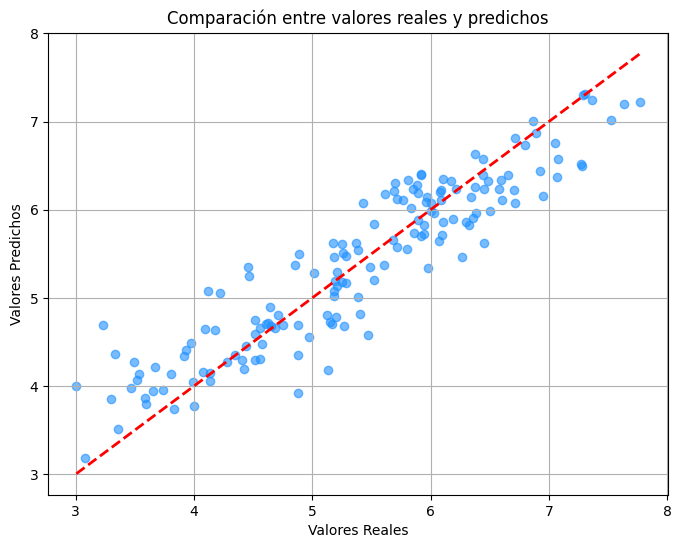

In [249]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred_ranf_model, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre valores reales y predichos')
plt.grid(True)
plt.show()

### 🧮 Distribución de Errores

Este histograma muestra los errores (residuos) del modelo.  
Un buen modelo debería tener errores centrados cerca de 0 y una forma simétrica, lo que indica que no hay sesgo sistemático.


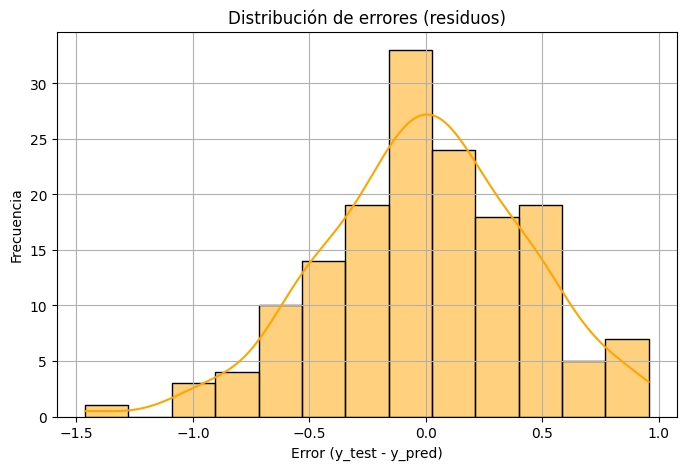

In [250]:
errors = y_test - y_pred_ranf_model

plt.figure(figsize=(8, 5))
sns.histplot(errors, kde=True, color='orange')
plt.title('Distribución de errores (residuos)')
plt.xlabel('Error (y_test - y_pred)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
